# Unsupervised Learning: Clustering

Below we are first importing packages and loading the infoumous `iris` dataset from scikit-learn's `datasets`. Then we will standarize the features. The features are standarized because clustering algorithms are sensitive to the scales of variables.

In [17]:
# importing packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

# loading the data from sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# standarizing the features
std = StandardScaler().fit_transform(X)

# defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# fit model
%timeit kmeans_cluster.fit(std)
y_pred = kmeans_cluster.predict(std)


# for vizualizing
pca = PCA(n_components=2).fit_transform(std)

21.7 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## k-means

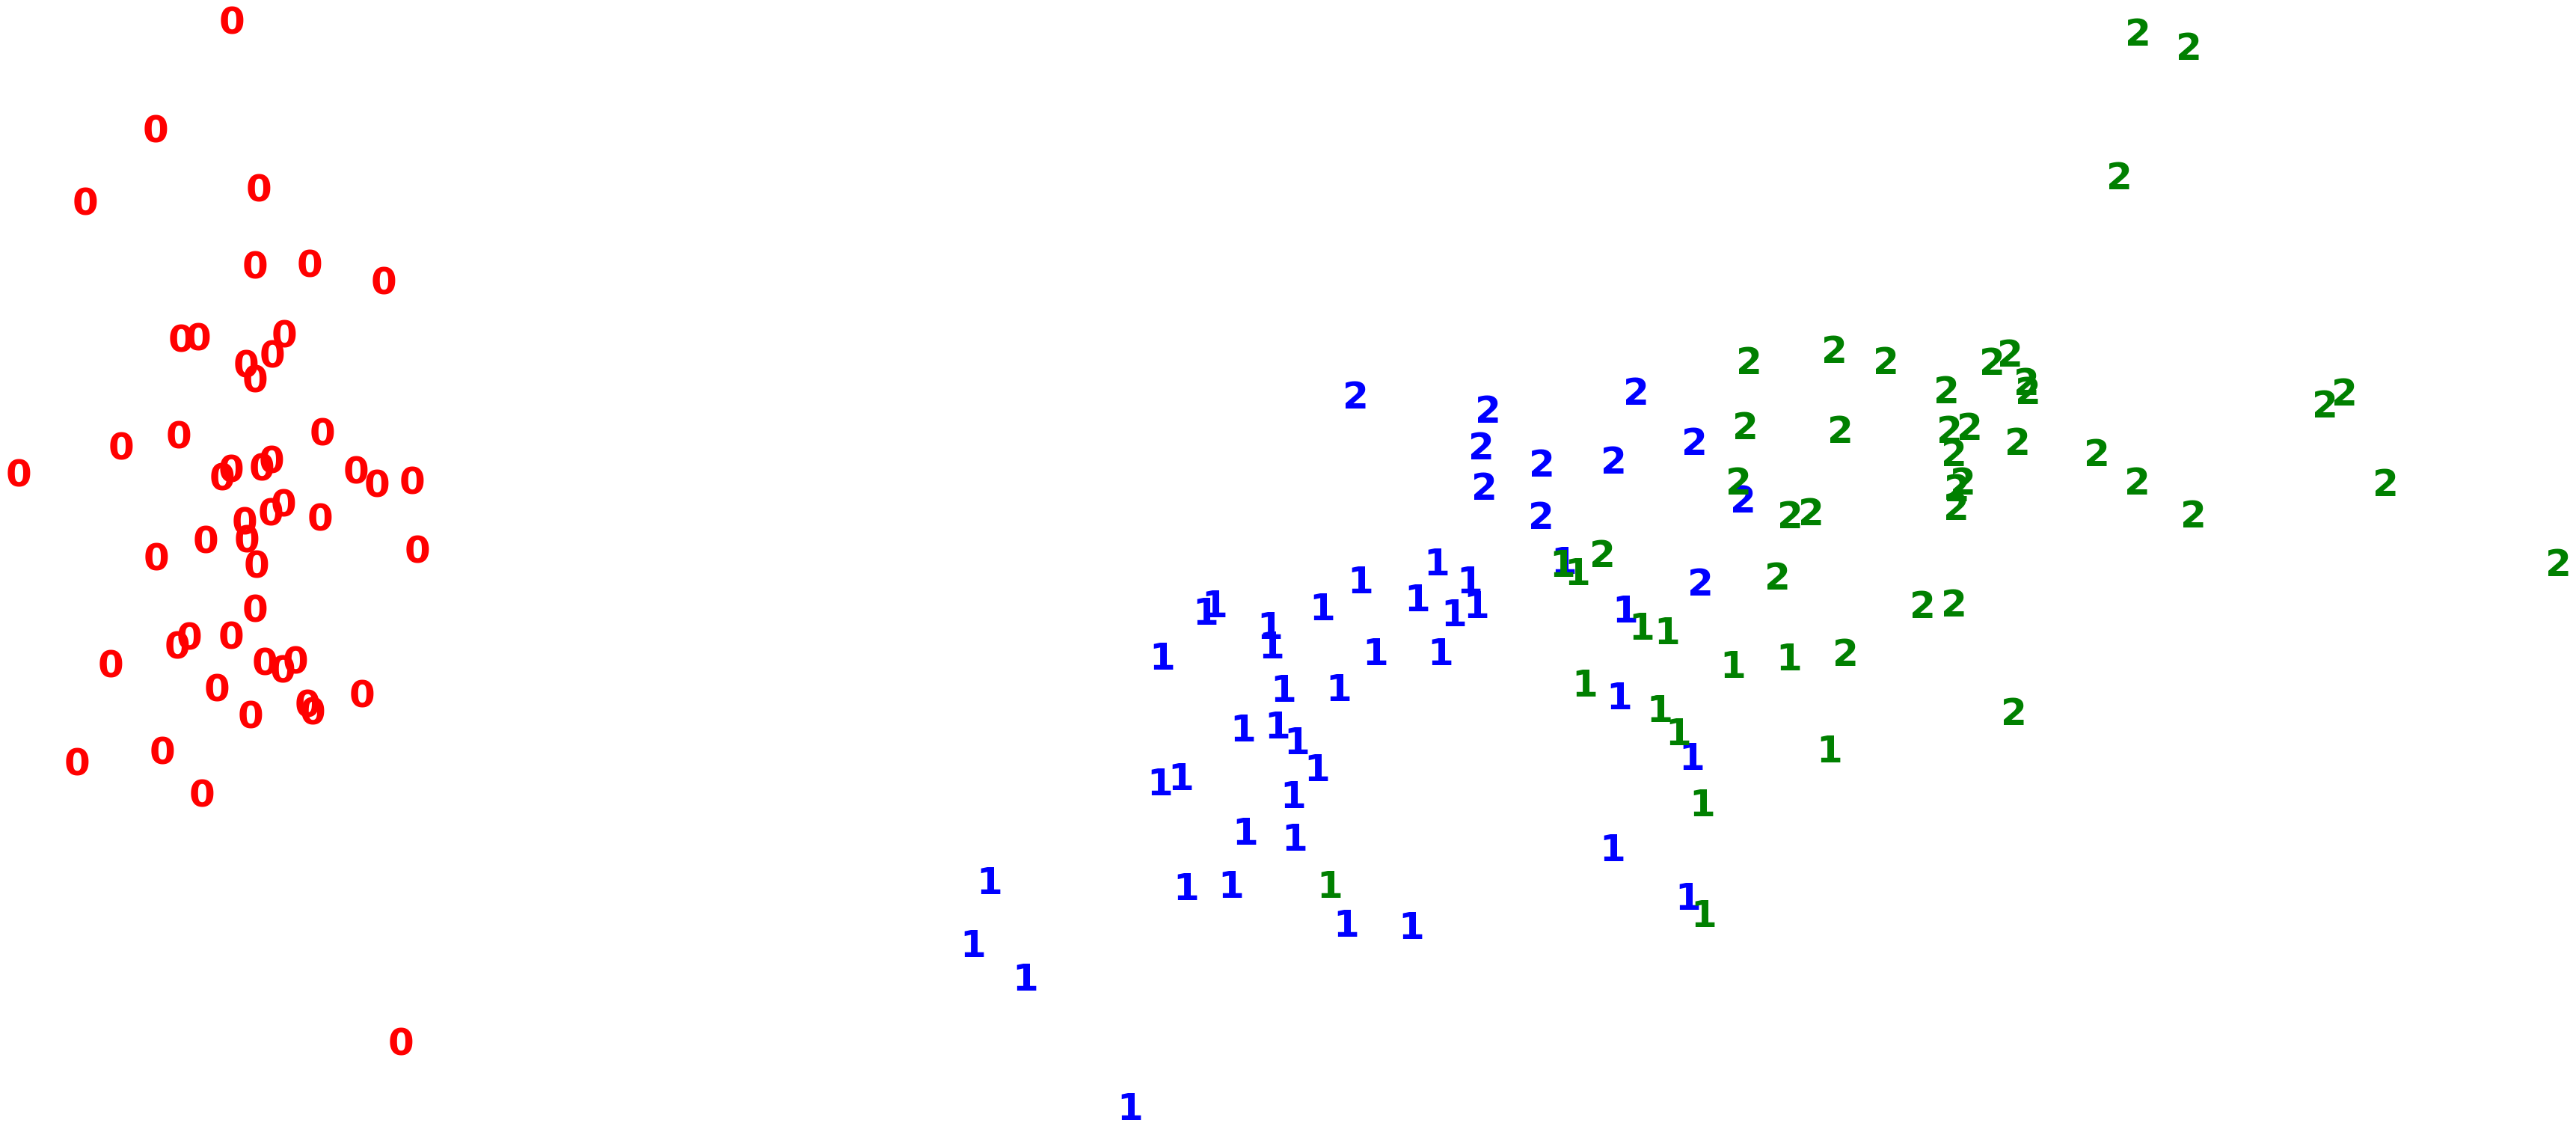

Comparing k-means clusters against the data:
col_0   0   1   2
row_0            
0      50   0   0
1       0  39  14
2       0  11  36


In [18]:
# visualize it
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

### Mini-Batch

11.2 ms ± 744 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


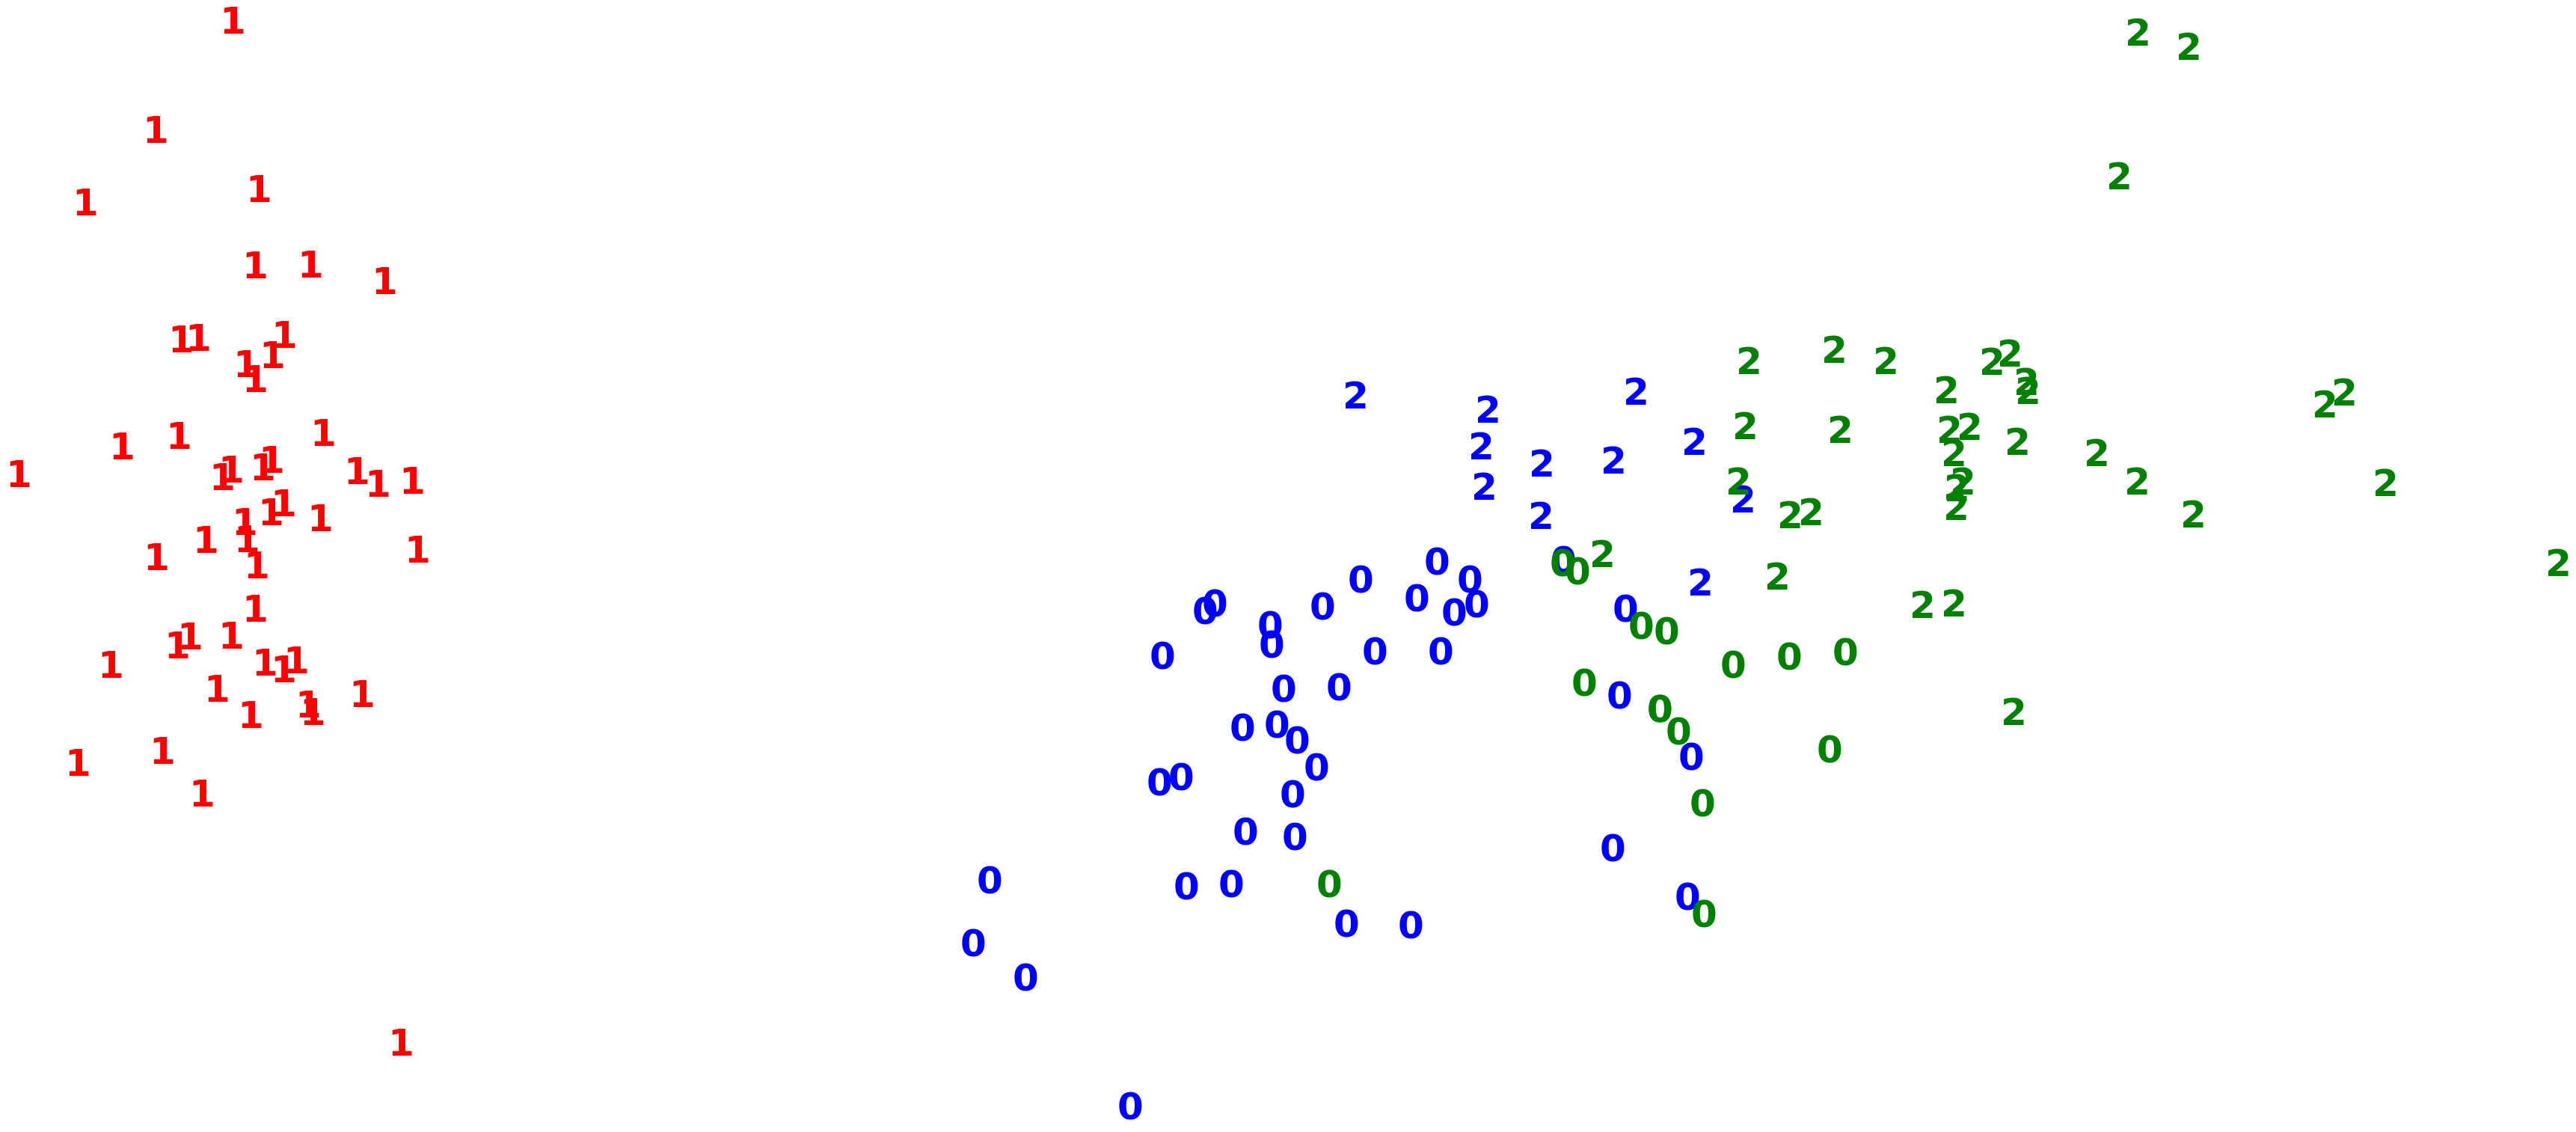

Comparing minibatch k-means clusters against the data:
col_0   0   1   2
row_0            
0      50   0   0
1       0  39  14
2       0  11  36


In [19]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(std)
minikmeans_cluster = minikmeans_cluster.predict(std)

# visualize it
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Check the solution against the data.
print('Comparing minibatch k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

## Evaluating Clusters

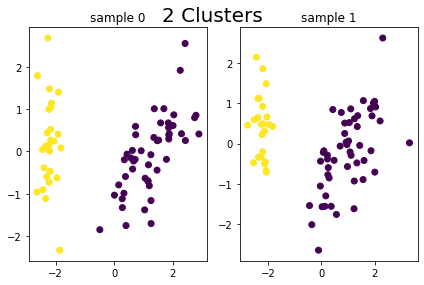

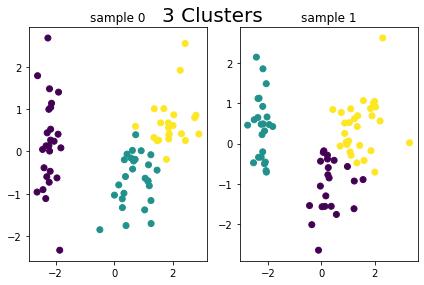

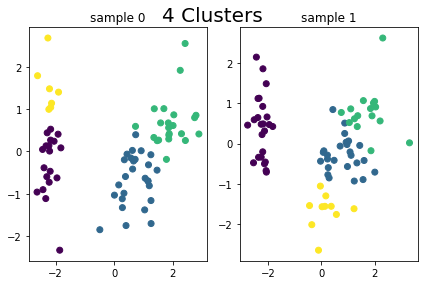

In [20]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    std,
    pca,
    test_size=0.5,
    random_state=13579)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

## Hierarcical Clustering

In hierarchical clustering, the cluster number is not specified. Hierarchical clustering algorithms work by combining the clusters in a hierarchical manner. So, these algorithms produce different clustering levels in a hierarchy of increasing k-values, and you choose the best one according to your needs.

In general, there are two types of hierarchical clustering approaches:

1. **Bottom-up approach**: Also called **agglomerative clustering**, this approach starts with the individual observations as stand-alone clusters. Then,
    * It combines the two most similar clusters into one, hence decreasing the total number of clusters by one.
    * It repeats the previous step above until only a single cluster remains. The figure above illustrates this approach.
    
2. **Top-down approach**: Also called **divisive clustering**, this approach starts with a single cluster. Then,
    * It uses a parametric clustering algorithm like k-means to divide the cluster into two clusters. 
    * It repeats the step above for every subcluster until all observations are clustered as stand-alone clusters.

Here, we will focus on agglomerative clustering. Notice that with the agglomerative clustering algorithm, we need to determine the **two most similar clusters** at each step.


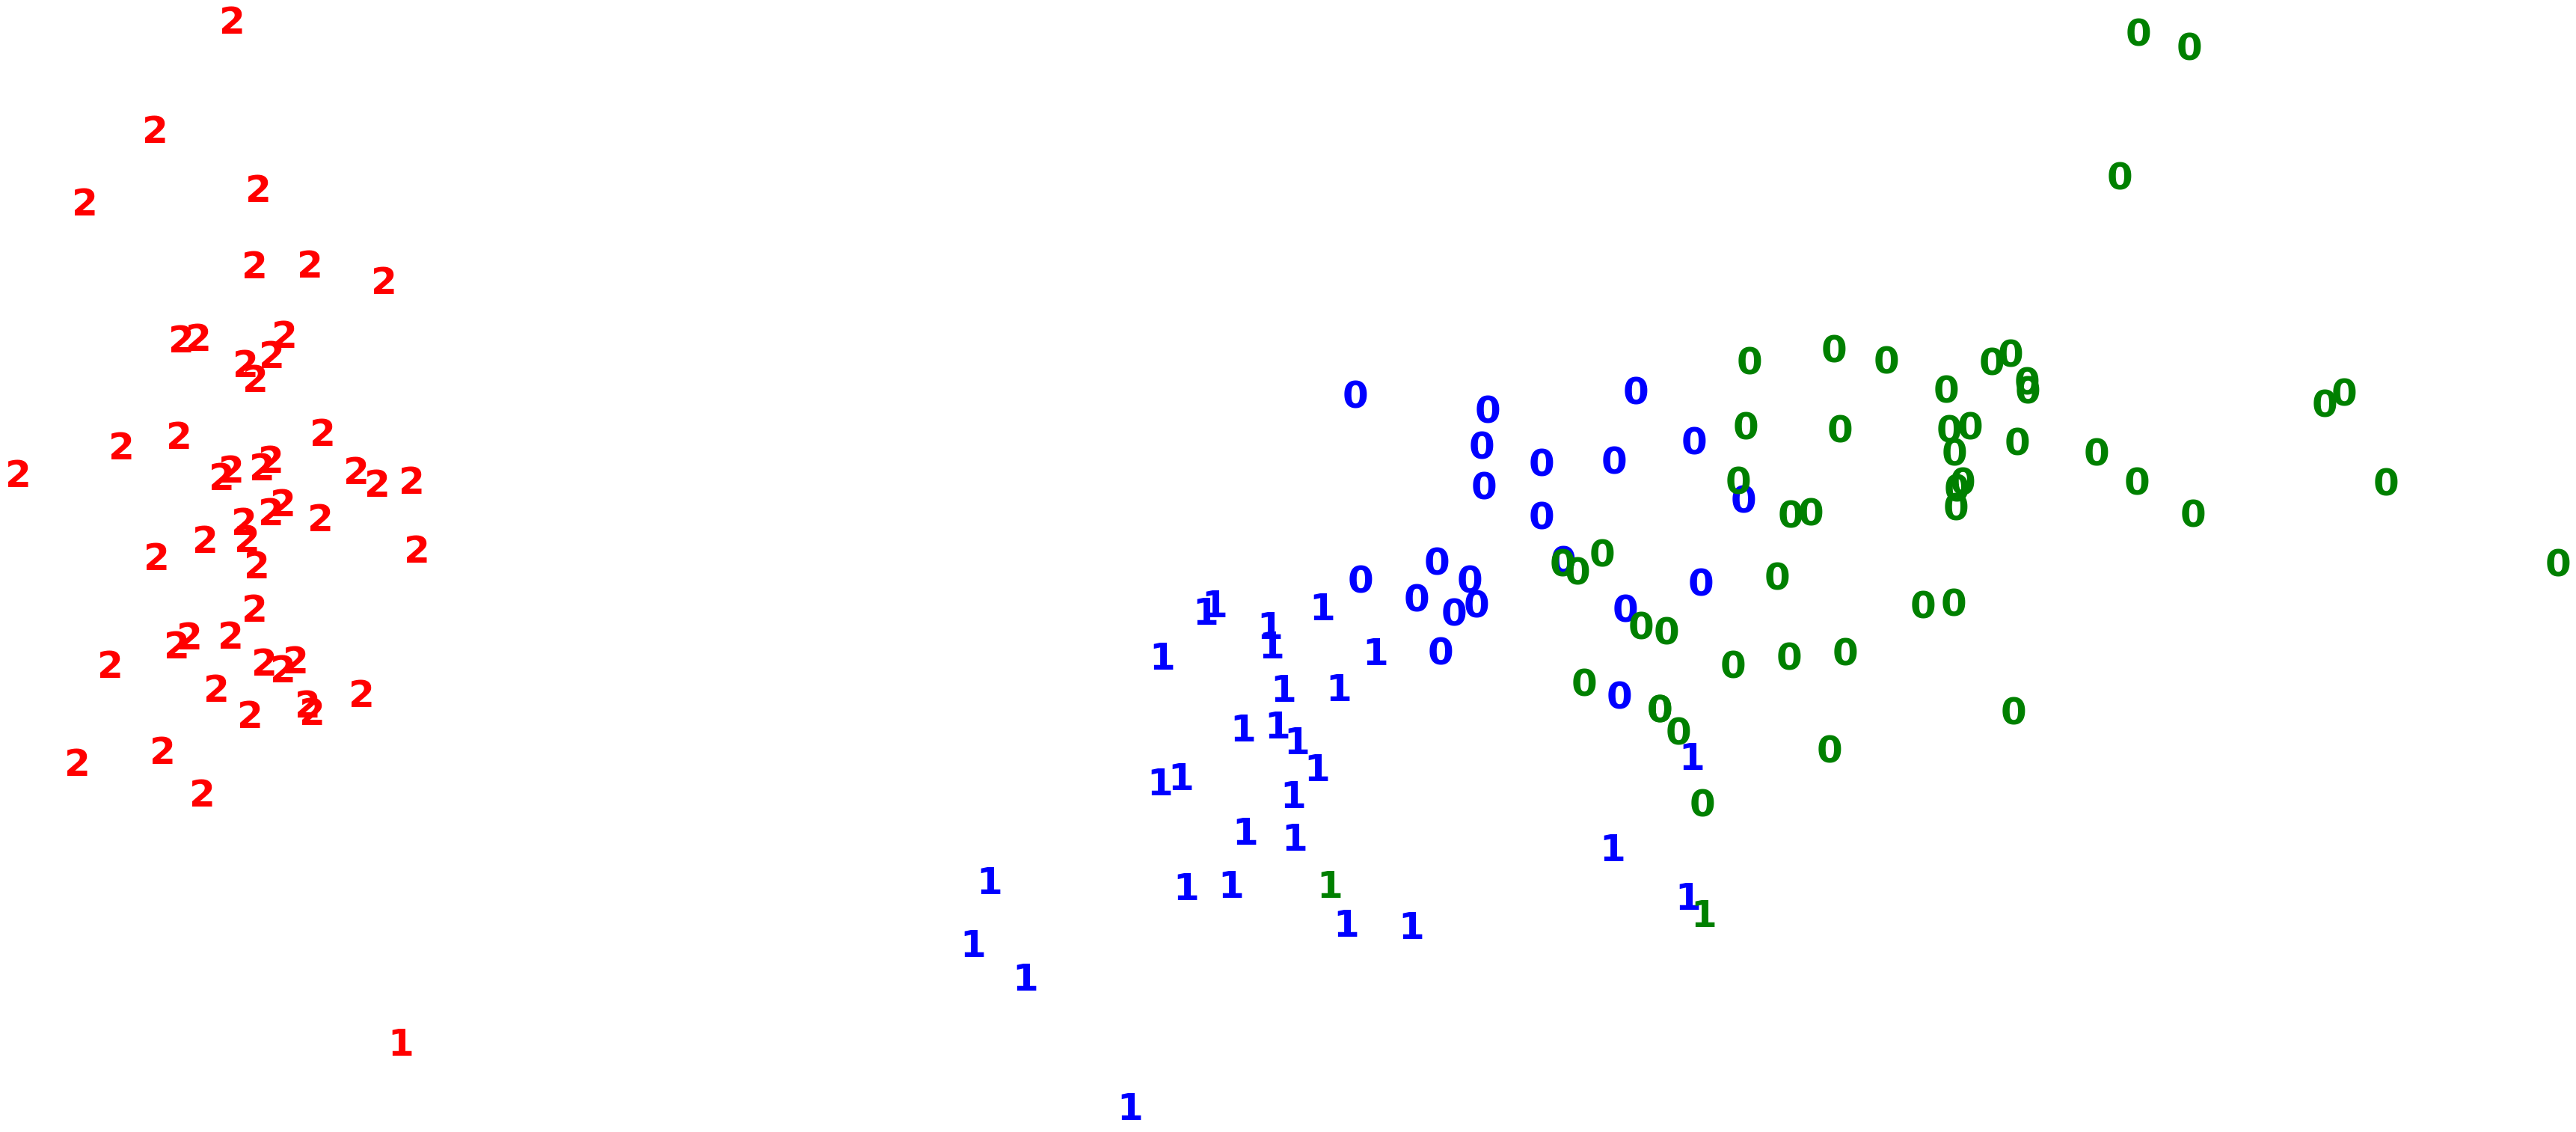

Adjusted Rand Index of the Agglomerative Clustering solution: 0.6334862915668319
The silhoutte score of the Agglomerative Clustering solution: 0.44662483949372017


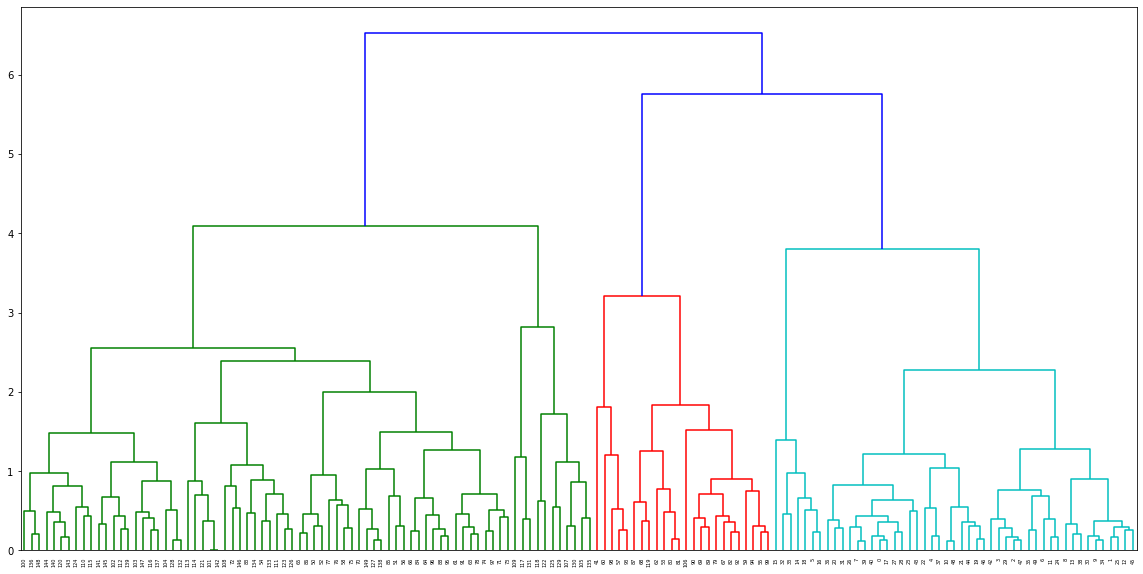

In [21]:
# defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(std, clusters, metric='euclidean')))

plt.figure(figsize=(20,10))
dendrogram(linkage(std, method='complete'))
plt.show()